In [2]:
import math
import numpy as np
import json
import pandas as pd
import glob

from src.constants import OUTPUTS_DIR

In [3]:
experiment_file = OUTPUTS_DIR / "estimate_convcode_conditional_entropy_variable_window_blocklen.json"

In [18]:
with open(experiment_file, "r") as e:
    results = json.load(e)

exp_results = pd.DataFrame([{**d["results"], **d["preamble"]["args"], "rsc": d["preamble"]["type"] == "rsc"}for d in results["data"] if "results" in d])
# I don't think it actually makes sense to take mean of ce_err
exp_results = exp_results.groupby(["snr", "window", "rsc", "block_len"]).agg({"ce__mean": "mean", "ce__err": "mean"}).reset_index(drop=False)

snr_vals = [4.0]
exp_results = exp_results[exp_results["snr"].isin(snr_vals)]
exp_results = exp_results[["ce__mean", "ce__err", "block_len", "window", "snr", "rsc"]]

In [19]:

exp_results.head()

,ce__mean,ce__err,block_len,window,snr,rsc
512,0.051575,0.000783,5,2,4.0,False
513,0.044262,0.000563,8,2,4.0,False
514,0.099257,0.000616,11,2,4.0,False
515,0.069175,0.000433,16,2,4.0,False
516,0.381494,0.000781,22,2,4.0,False


/tmp/ipykernel_8594/2331333147.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


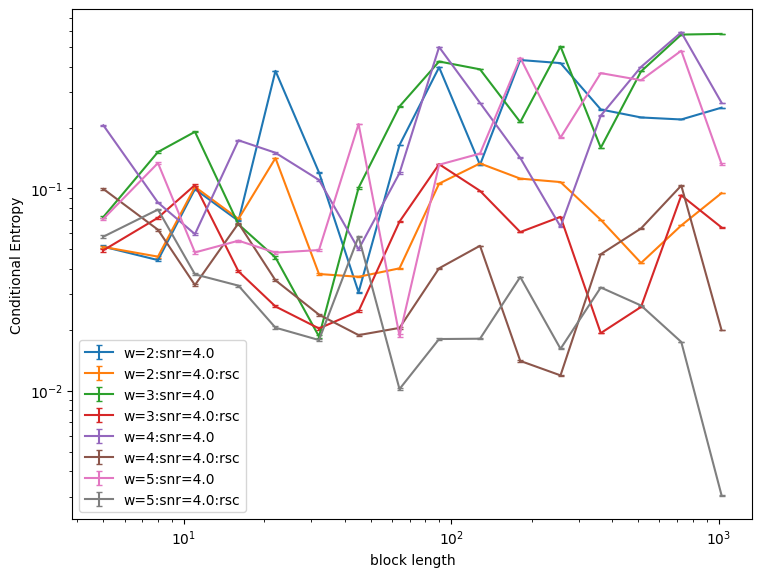

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
capsize = 2

for (snr, window, rsc), exp_result in exp_results.groupby(["snr", "window", "rsc"]):
    ax.errorbar(
        exp_result["block_len"], 
        exp_result["ce__mean"], 
        yerr=exp_result["ce__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"w={window}:snr={snr}{':rsc' if rsc else ''}"
    )
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('block length')
ax.set_ylabel('Conditional Entropy')

fig.show()